# Wstęp
Do projektu końcowego wybrano zbiór:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant. Zawiera on dane z elektrowni z lat 2006-2011, kiedy elektrownia pracowała pod pełnym obciążeniem. Atrybutami w zbiorze danych sa:

`AT` - temperatura otoczenia (zakres 1,81°C i 37,11°C)

`AP` - Ciśnienie otoczenia (zakres 992,89-1033,30 milibar)

`RH` - Wilgotność względna (zakres 25,56% do 100,16%)

`V` - podciśnienie wylotowe (zakres 25,36-81,56 cm Hg)

Zmienną objaśnianą jest natomiast:

`PE` - godzinowa produkcja energii elektrycznej netto (zakres 420,26-495,76 MW)

Pełne repozytorium z projektu końcowego można również znaleźc pod linkiem: 
https://github.com/BAPO-Developers/Przetwarzanie-danych-eksperymentalnych/tree/main/Koncowy

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as slm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_excel('data.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# Analiza statystyczna danych
Stworzono histogram wszytskich zmiennych za pomoca funkcji `hist` biblioteki `Pandas`:

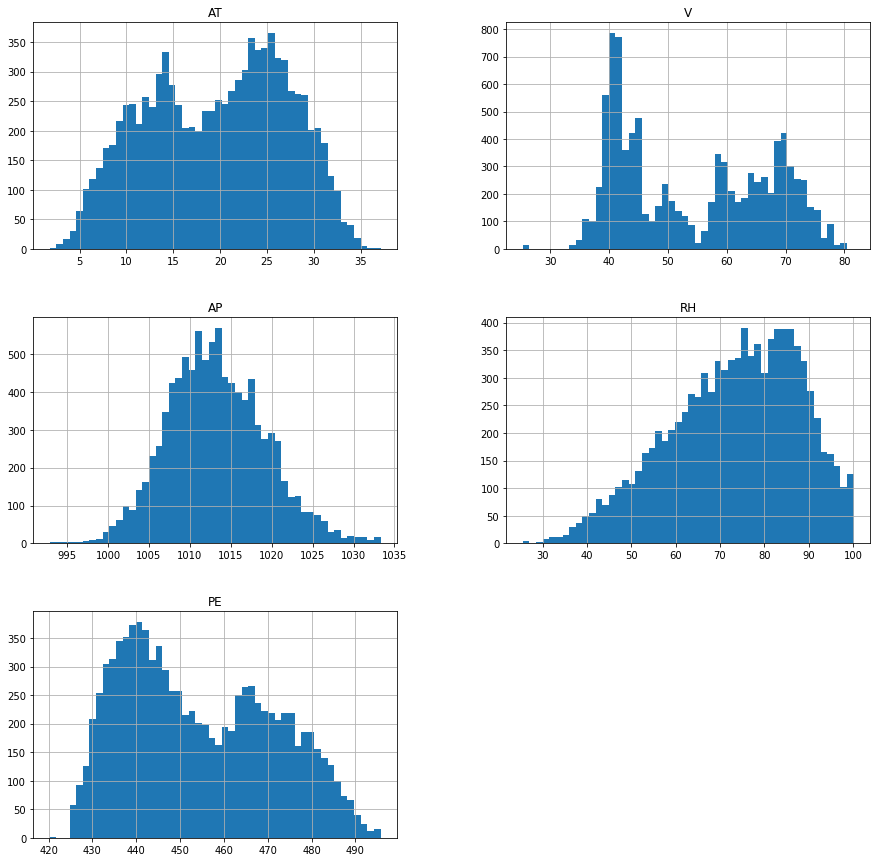

In [3]:
df.hist(bins=50, figsize=(15,15))
plt.show()

Przy użyciu fukcji `describe` z pakietu `Pandas` policzono takie parametry jak:

$count$ - ilość

$mean$ - średnia

$std$ - odchylenie standardowe

$min$ - najmniejsza wartość

$25$% - dolny kwartyl (Q1)

$50$% - mediana (Q2)

$75$% - górny kwartyl (Q3)

$max$ - największa wartość 

In [10]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Obliczona została korelacja Pearsona i Spearmana do zmiennej objaśnianej
Do obliczenia korelacji użyto funkcji `corr` biblioteki Pandas. W przypadku korelacji Pearsona należało ustawić atrybut `method='pearson`, natomiast dla Spearmana `method='spearman'`. Poniżej wyliczono kolealcje zmiennej objaśnianej ze zmiennymi objaśniającymi. Stworzono również wykresy zależności pomiędzy wszytskimi zmiennymi, aby graficznie przedstawić zależności między nimi.

In [4]:
corr_matrix = df.corr(method='pearson')
corr_matrix['PE']

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

In [5]:
corr_matrix = df.corr(method='spearman')
corr_matrix['PE']

AT   -0.944412
V    -0.883702
AP    0.542531
RH    0.389640
PE    1.000000
Name: PE, dtype: float64

array([[<AxesSubplot:xlabel='AT', ylabel='AT'>,
        <AxesSubplot:xlabel='V', ylabel='AT'>,
        <AxesSubplot:xlabel='AP', ylabel='AT'>,
        <AxesSubplot:xlabel='RH', ylabel='AT'>,
        <AxesSubplot:xlabel='PE', ylabel='AT'>],
       [<AxesSubplot:xlabel='AT', ylabel='V'>,
        <AxesSubplot:xlabel='V', ylabel='V'>,
        <AxesSubplot:xlabel='AP', ylabel='V'>,
        <AxesSubplot:xlabel='RH', ylabel='V'>,
        <AxesSubplot:xlabel='PE', ylabel='V'>],
       [<AxesSubplot:xlabel='AT', ylabel='AP'>,
        <AxesSubplot:xlabel='V', ylabel='AP'>,
        <AxesSubplot:xlabel='AP', ylabel='AP'>,
        <AxesSubplot:xlabel='RH', ylabel='AP'>,
        <AxesSubplot:xlabel='PE', ylabel='AP'>],
       [<AxesSubplot:xlabel='AT', ylabel='RH'>,
        <AxesSubplot:xlabel='V', ylabel='RH'>,
        <AxesSubplot:xlabel='AP', ylabel='RH'>,
        <AxesSubplot:xlabel='RH', ylabel='RH'>,
        <AxesSubplot:xlabel='PE', ylabel='RH'>],
       [<AxesSubplot:xlabel='AT', ylabel='PE'

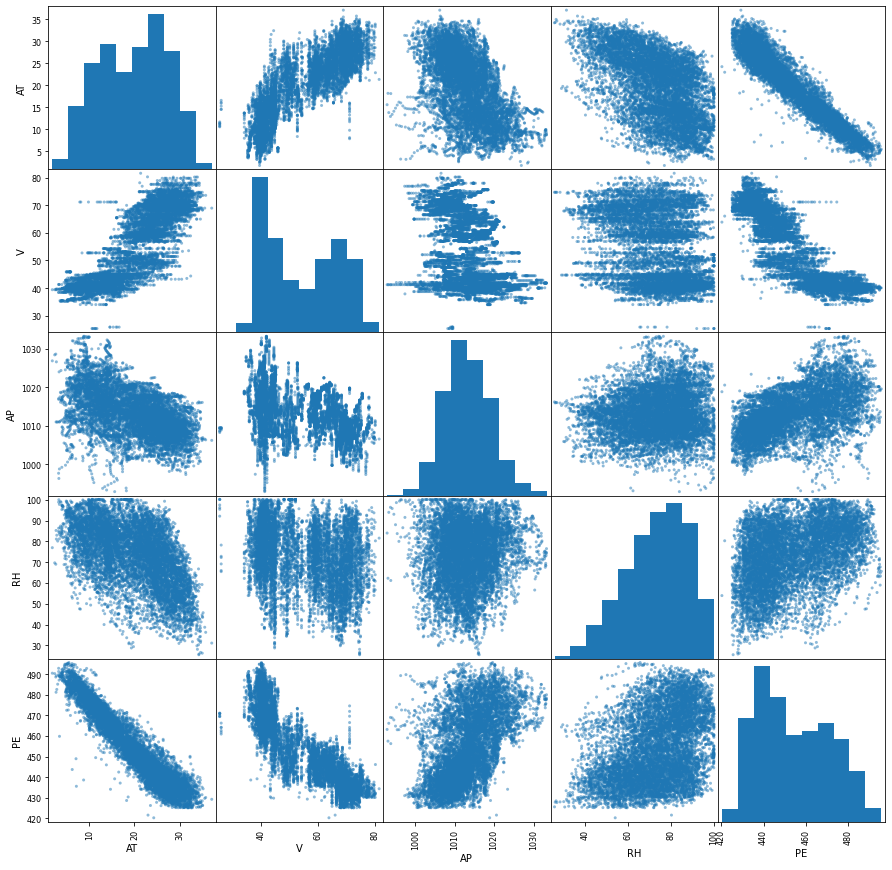

In [6]:
pd.plotting.scatter_matrix(df, figsize=(15,15))


## Macierz kowariancji między cechami
Kolejnym punktem było wyliczenie macierzy kowariancji między cechami. W tym celu wywołano funkcję `cov()` z biblioteki `Pandas` na zbiorze nie zawierającym zmiennej objaśnianej.

In [7]:
df.drop(columns=['PE']).cov()

,AT,V,AP,RH
AT,55.539357,79.941324,-22.463437,-59.032171
V,79.941324,161.490544,-31.206771,-57.922808
AP,-22.463437,-31.206771,35.269152,8.633874
RH,-59.032171,-57.922808,8.633874,213.167848
